In [15]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("covid_19_indonesia_time_series_all.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

"Rata-rata kasus baru harian di DKI Jakarta lebih dari 1000 kasus/hari."

H0: mean_pop <= 1000

H1: mean_pop > 1000

One tailed, CV = 5%

In [17]:
df_JKT = df[df['Location']=='DKI Jakarta']['New Cases']
df_JKT

0         2
1         2
4         2
8         2
12        0
         ..
21601    51
21635    41
21668    44
21701    70
21733    28
Name: New Cases, Length: 642, dtype: int64

In [18]:
df_JKT.info()

<class 'pandas.core.series.Series'>
Int64Index: 642 entries, 0 to 21733
Series name: New Cases
Non-Null Count  Dtype
--------------  -----
642 non-null    int64
dtypes: int64(1)
memory usage: 10.0 KB


In [19]:
df_JKT.describe()

count      642.000000
mean      1345.806854
std       2186.762238
min          0.000000
25%        141.000000
50%        734.000000
75%       1359.750000
max      14622.000000
Name: New Cases, dtype: float64

<AxesSubplot:xlabel='New Cases', ylabel='Count'>

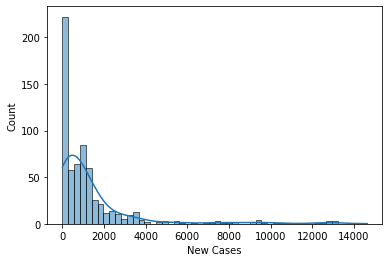

In [20]:
sns.histplot(df_JKT,kde=True)

In [36]:
t_stat, pval = stats.ttest_1samp(df_JKT,1000,alternative='greater')
t_stat,pval

(4.0068173410190235, 3.438325382214027e-05)

C:\Users\Judan Syamsul Hadad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


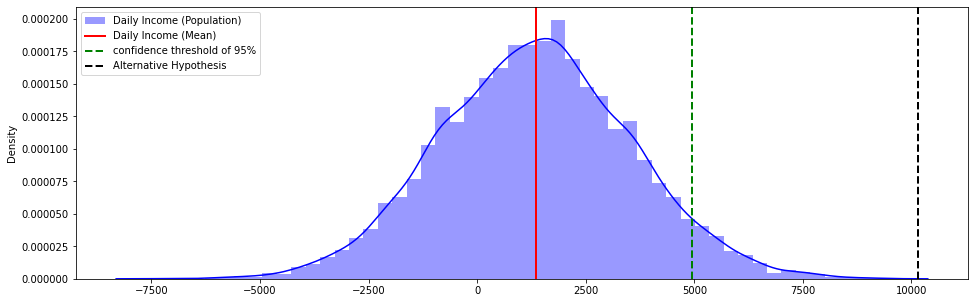

In [40]:
df_JKT_pop = np.random.normal(df_JKT.mean(), df_JKT.std(), 10000)

ci = stats.norm.interval(0.90, df_JKT.mean(), df_JKT.std())

plt.figure(figsize=(16,5))
sns.distplot(df_JKT_pop , label='Daily Income (Population)', color='blue')
plt.axvline(df_JKT.mean(), color='red', linewidth=2, label='Daily Income (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(df_JKT_pop .mean() + t_stat*df_JKT_pop .std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

In [38]:
t_stat, pval = stats.ttest_1samp(df_JKT,1000,alternative='two-sided')
t_stat,pval/2

(4.0068173410190235, 3.438325382214027e-05)

Tolak H0. Terdapat cukup bukti untuk menolak pernyataan rata-rata kasus baru harian di DKI Jakarta kurang dari sama dengan 1000 kasus/hari.

C:\Users\Judan Syamsul Hadad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


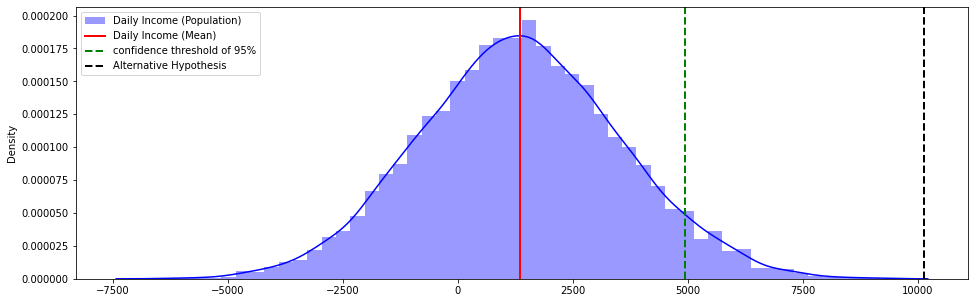

In [39]:
df_JKT_pop = np.random.normal(df_JKT.mean(), df_JKT.std(), 10000)

ci = stats.norm.interval(0.90, df_JKT.mean(), df_JKT.std())

plt.figure(figsize=(16,5))
sns.distplot(df_JKT_pop , label='Daily Income (Population)', color='blue')
plt.axvline(df_JKT.mean(), color='red', linewidth=2, label='Daily Income (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(df_JKT_pop .mean() + t_stat*df_JKT_pop .std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

In [26]:
df_JKT_pop.mean()

1345.193162014405

---

"Rata-rata kasus baru harian di DKI Jakarta kurang dari 1000 kasus/hari."

H0: mean_pop >= 1000

H1: mean_pop < 1000

One tailed, CV = 5%

In [30]:
t_stat, pval = stats.ttest_1samp(df_JKT,1000,alternative='less')
t_stat,pval/2

(4.0068173410190235, 0.49998280837308895)

C:\Users\Judan Syamsul Hadad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


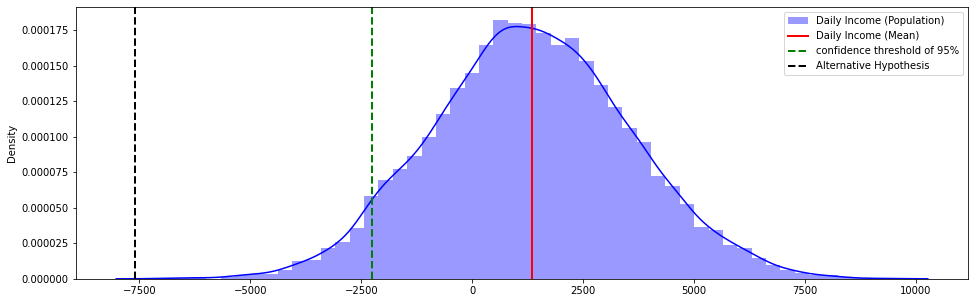

In [29]:
df_JKT_pop = np.random.normal(df_JKT.mean(), df_JKT.std(), 10000)

ci = stats.norm.interval(0.90, df_JKT.mean(), df_JKT.std())

plt.figure(figsize=(16,5))
sns.distplot(df_JKT_pop , label='Daily Income (Population)', color='blue')
plt.axvline(df_JKT.mean(), color='red', linewidth=2, label='Daily Income (Mean)')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(df_JKT_pop .mean() - t_stat*df_JKT_pop .std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()